In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation,MaxPooling2D
from keras.models import Model
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = 'D:/Datasets/Image_DF/seg_train'
test_dir = 'D:/Datasets/Image_DF/seg_test'

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

Found 14034 images belonging to 6 classes.


In [6]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

Found 3000 images belonging to 6 classes.


In [7]:
print(train_generator.class_indices)
print(test_generator.class_indices)

{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


In [8]:
test_generator[0]

(array([[[[0.1764706 , 0.21568629, 0.07058824],
          [0.01568628, 0.02352941, 0.        ],
          [0.1137255 , 0.09019608, 0.04313726],
          ...,
          [0.49803925, 0.6       , 0.4156863 ],
          [0.0509804 , 0.17254902, 0.        ],
          [0.6156863 , 0.76470596, 0.42352945]],
 
         [[0.19607845, 0.18823531, 0.09019608],
          [0.07058824, 0.0509804 , 0.        ],
          [0.11764707, 0.10196079, 0.05490196],
          ...,
          [0.48627454, 0.5803922 , 0.34509805],
          [0.29803923, 0.40000004, 0.16078432],
          [0.56078434, 0.68235296, 0.37647063]],
 
         [[0.21568629, 0.16862746, 0.10588236],
          [0.07058824, 0.04313726, 0.        ],
          [0.11764707, 0.10980393, 0.0509804 ],
          ...,
          [0.3019608 , 0.38431376, 0.12941177],
          [0.34509805, 0.43137258, 0.18823531],
          [0.69803923, 0.8000001 , 0.50980395]],
 
         ...,
 
         [[0.24705884, 0.36862746, 0.13333334],
          [0.34117

In [9]:
i , l = next(train_generator)

In [10]:
i

array([[[[7.71279812e-01, 3.55593503e-01, 3.63436639e-01],
         [7.66310453e-01, 3.50624144e-01, 3.58467281e-01],
         [7.62677133e-01, 3.46990824e-01, 3.54833990e-01],
         ...,
         [6.52490318e-01, 2.21117765e-01, 2.17196196e-01],
         [6.66542292e-01, 2.35169709e-01, 2.31248140e-01],
         [6.79174244e-01, 2.47801676e-01, 2.43880108e-01]],

        [[7.74994373e-01, 3.59308094e-01, 3.67151231e-01],
         [7.68577635e-01, 3.52891386e-01, 3.60734522e-01],
         [7.64504731e-01, 3.48818451e-01, 3.56661588e-01],
         ...,
         [6.55117214e-01, 2.23744676e-01, 2.19823107e-01],
         [6.63814902e-01, 2.32442364e-01, 2.28520796e-01],
         [6.78642809e-01, 2.47270226e-01, 2.43348658e-01]],

        [[7.80866504e-01, 3.65180224e-01, 3.73023361e-01],
         [7.72697687e-01, 3.57011437e-01, 3.68517131e-01],
         [7.68545389e-01, 3.52859110e-01, 3.68381143e-01],
         ...,
         [6.70116901e-01, 2.38744333e-01, 2.34822765e-01],
         [

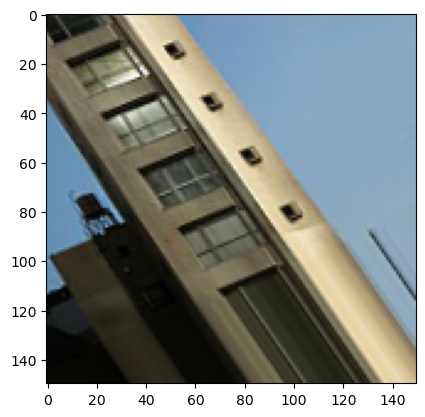

In [11]:
plt.imshow(i[1])

In [12]:
l[1]

array([1., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
input_layer = Input((150,150,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(6)(x)
output_layer = Activation('softmax')(x)

In [14]:
model = Model(input_layer, output_layer)

In [15]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 150, 150, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 75, 75, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 38, 38, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 38, 38, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 38, 38, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 92416)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,829,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             7

 Total params: 11,896,998 (45.38 MB)

 Trainable params: 11,896,358 (45.38 MB)

 Non-trainable params: 640 (2.50 KB)

In [16]:
opt = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [17]:
model.fit(train_generator,
          batch_size=32,
          epochs=10,
          shuffle=True
         )

Epoch 1/10


C:\Users\athul\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


439/439 ━━━━━━━━━━━━━━━━━━━━ 777s 2s/step - accuracy: 0.4908 - loss: 1.4398
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 671s 2s/step - accuracy: 0.5853 - loss: 1.0895
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 611s 1s/step - accuracy: 0.6270 - loss: 0.9949
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 602s 1s/step - accuracy: 0.6482 - loss: 0.9437
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 595s 1s/step - accuracy: 0.6852 - loss: 0.8710
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 589s 1s/step - accuracy: 0.6774 - loss: 0.8618
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 575s 1s/step - accuracy: 0.6900 - loss: 0.8320
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 611s 1s/step - accuracy: 0.7005 - loss: 0.8102
Epoch 9/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 611s 1s/step - accuracy: 0.7083 - loss: 0.7890
Epoch 10/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 609s 1s/step - accuracy: 0.7186 - loss: 0.7613


In [18]:
model.evaluate(test_generator,batch_size=1000)

94/94 ━━━━━━━━━━━━━━━━━━━━ 56s 589ms/step - accuracy: 0.7289 - loss: 0.7560


[0.7368640303611755, 0.7350000143051147]

In [19]:
CLASSES = np.array(['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'])

In [20]:
preds = model.predict(i)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step


In [21]:
preds[4]

array([1.04852235e-02, 3.52283067e-04, 2.13841707e-01, 5.01371562e-01,
       2.72442251e-01, 1.50691229e-03], dtype=float32)

In [22]:
preds_single = CLASSES[np.argmax(preds, axis = -1)]

In [23]:
preds_single[4]

'mountain'

In [24]:
np.array(l)

array([[0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [1.

In [25]:
test_generator[1]

(array([[[[0.45882356, 0.49803925, 0.5019608 ],
          [0.31764707, 0.34901962, 0.35686275],
          [0.47058827, 0.4901961 , 0.5019608 ],
          ...,
          [0.00784314, 0.00392157, 0.        ],
          [0.10196079, 0.08235294, 0.06666667],
          [0.25490198, 0.227451  , 0.20392159]],
 
         [[0.2901961 , 0.32941177, 0.3254902 ],
          [0.2392157 , 0.27450982, 0.27058825],
          [0.43921572, 0.45882356, 0.47058827],
          ...,
          [0.20392159, 0.18823531, 0.1764706 ],
          [0.1137255 , 0.08235294, 0.07058824],
          [0.43137258, 0.3921569 , 0.38431376]],
 
         [[0.43137258, 0.4666667 , 0.46274513],
          [0.12156864, 0.15686275, 0.15294118],
          [0.1254902 , 0.14901961, 0.14901961],
          ...,
          [0.16078432, 0.14509805, 0.13333334],
          [0.15294118, 0.13333334, 0.12156864],
          [0.54509807, 0.5058824 , 0.49803925]],
 
         ...,
 
         [[0.2392157 , 0.2392157 , 0.24705884],
          [0.22745

In [26]:
actual_single[0]

NameError: name 'actual_single' is not defined

In [ ]:
actual_single = CLASSES[np.argmax(l, axis = -1)]

In [ ]:
i

In [ ]:
random_indices = random.sample(range(len(i)), 10)

# Plot the randomly selected images along with actual and predicted labels
plt.figure(figsize=(20, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(i[idx])
    plt.title(f'Actual: {actual_single[idx]}\nPredicted: {preds_single[idx]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# import matplotlib.pyplot as plt

# n_to_show = 10
# indices = np.random.choice(range(len(l)), n_to_show)

# fig = plt.figure(figsize=(20, 10))
# #fig.subplots_adjust(hspace=0.4, wspace=0.4)

# for i, idx in enumerate(indices):
#     img = l[idx]
#     ax = fig.add_subplot(1, n_to_show, i+1)
#     ax.axis('off')
#     ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
#     ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
#     ax.imshow(img)
